In [1]:
#Crie dois vetores com 5000 números aleatórios, os dois distribuídos gaussianamente. Observe que nesse exemplo, cada posição no vetor correspondente a uma mesma pessoa.
# 1. o primeiro com centro em 36 e desvio padrão de 4, o qual suporemos que é uma distribuição de idade
# 2. o segundo com centro em 7000 e desvio padrão de 1000, o qual suporemos que é uma distribuição de renda

# dicas: - pode utilizar os métodos rvs das funções na biblioteca stat da scipy
#        - https://docs.scipy.org/doc/scipy/reference/stats.html

import scipy.stats as st

idade = st.norm.rvs(loc=36, scale=4, size=5000, random_state=None)
renda = st.norm.rvs(loc=7000, scale=1000, size=5000, random_state=None)

In [2]:
#Calcule a covariância, correlação de Pearson e correlação de Spearman para entre as duas distribuições
#
# dicas: - pode utilizar a função "cov" da biblioteca numpy e as unções na biblioteca stat da scipy
#        - https://numpy.org/doc/stable/reference/generated/numpy.cov.html
#        - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
#        - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

import numpy as np
import scipy.stats as st

cov_mat = np.cov(idade,renda)
cov = np.dot(idade-np.mean(idade), renda-np.mean(renda))/ len(renda)

per, per_pvalue = st.pearsonr(idade,renda)

spe, spe_pvalue = st.spearmanr(idade,renda)


In [3]:
cov_mat

Out[3]: array([[1.57203021e+01, 3.48305878e+01],
 [3.48305878e+01, 9.90302888e+05]])

In [4]:
cov = cov_mat[0][1]

In [5]:
cov

Out[5]: 34.83058778191434

In [6]:
#Não há no python gráficos que plotem distribuições em 3D e curvas de níveis, portanto é necessário transformar as duas distribuições em um sistema de três variáveis,
#para isso é possível usar o método "histogram" para uma variável ou "histogram2d" para duas variáveis da biblioteca numpy, faça-o já utilizando o equivalente em zscore
#
#dica:  -veja a documentação
#        https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

import numpy as np
(z_frequency, x_bins, y_bins) = np.histogram2d(idade,renda)
x_bins = [(x+x_bins[i-1+1])/2 for i,x in enumerate(x_bins[1:])]
y_bins = [(x+y_bins[i-1+1])/2 for i,x in enumerate(y_bins[1:])]

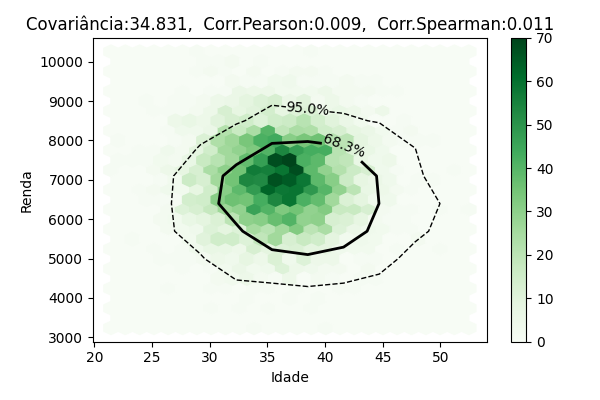

In [7]:
#A partir das relações entre as distribuições em zscore e sua frequência, plote um espalhamento com curvas de nível das distribuições da sua frequência
#Imprima no título do gráfico a covariância, correlações de Pearson e Spearman

#dica:  -utilize o gráfico "contour" mas agora informando a terceira dimensão, o rankeamente de percentil
#        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html
#        https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
#
#        -Não encontrei como fazer o zscore de uma frequência já computada, e portanto em função do máximo, então fiz manualmetne como no exemplo abaixo

z_frequency_score = [[100*np.sum([[y1 if y1>y else 0 for y1 in x1] for x1 in z_frequency])/np.sum(z_frequency) for y in x] for x in z_frequency] 

import matplotlib.pyplot as plt
import scipy.stats as st

f, ax1 = plt.subplots(figsize=(6, 4))

hb= ax1.hexbin(idade,renda, cmap='Greens', gridsize=25, alpha=1)
cs = ax1.contour(x_bins,y_bins, z_frequency_score, [68.3,95], colors='black', linestyles =['solid','dashed'], linewidths =[2,1])
ax1.set_xlabel('Idade')
ax1.set_ylabel('Renda')

ax1.set_title('Covariância:'+str(np.round(cov,3))+',  Corr.Pearson:'+str(np.round(per,3))+',  Corr.Spearman:'+str(np.round(spe,3)))

ax1.clabel(cs, inline=1, fontsize=10, fmt='%1.1f%%')
f.colorbar(hb, ax=ax1)



f.tight_layout()
display(f)


In [8]:
#Gere novamente tais distribuições de renda e idade, mas agora com uma matriz de covariância, mantenha as mesmas variâncias de idade e renda mas introduza um valor de 2000 de covariância, com tamanho de 5000 elementos

#dica: -veja documentação da função random.multivariate_normal
#       https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.multivariate_normal.html

X_Y = np.random.multivariate_normal([X_mu,Y_mu],[[X_var,XY_covvar],[XY_covvar,Y_var]], size)
X = X_Y[:,0]
Y = X_Y[:,1]

In [9]:
idade = st.norm.rvs(mu=36, sqrt(var)=4, size=5000, random_state=None)
renda = st.norm.rvs(loc=7000, sqrt(var)=1000, size=5000, random_state=None)

File "<command-6450152>" , line 1 
 idade = st.norm.rvs(mu=36, sqrt(var)=4, size=5000, random_state=None) 
 ^
 SyntaxError : keyword can't be an expression

In [10]:
idade_renda = np.random.multivariate_normal([36,7000],[[4**2,2000],[2000,1000**2]], 5000)

In [11]:
idade = idade_renda[:,0]
renda = idade_renda[:,1]

In [12]:
idade = idade_renda[:,0]
Y = X_Y[:,1]

In [13]:
#Repida os passos, os cálculos das covariâncias, correlações de Pearson e Spearman, e plote tudo novamente

In [14]:
import numpy as np
import scipy.stats as st

cov_mat = np.cov(idade,renda)
cov = np.dot(idade-np.mean(idade), renda-np.mean(renda))/ len(renda)

per, per_pvalue = st.pearsonr(idade,renda)

spe, spe_pvalue = st.spearmanr(idade,renda)


In [15]:
per_pvalue

Out[20]: 0.0

In [16]:
import numpy as np
(z_frequency, x_bins, y_bins) = np.histogram2d(idade,renda)
x_bins = [(x+x_bins[i-1+1])/2 for i,x in enumerate(x_bins[1:])]
y_bins = [(x+y_bins[i-1+1])/2 for i,x in enumerate(y_bins[1:])]

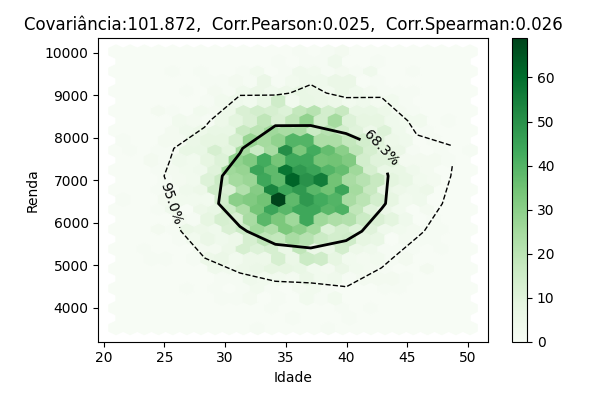

In [17]:
z_frequency_score = [[100*np.sum([[y1 if y1>y else 0 for y1 in x1] for x1 in z_frequency])/np.sum(z_frequency) for y in x] for x in z_frequency] 

import matplotlib.pyplot as plt
import scipy.stats as st

f, ax1 = plt.subplots(figsize=(6, 4))

hb= ax1.hexbin(idade,renda, cmap='Greens', gridsize=25, alpha=1)
cs = ax1.contour(x_bins,y_bins, z_frequency_score, [68.3,95], colors='black', linestyles =['solid','dashed'], linewidths =[2,1])
ax1.set_xlabel('Idade')
ax1.set_ylabel('Renda')

ax1.set_title('Covariância:'+str(np.round(cov,3))+',  Corr.Pearson:'+str(np.round(per,3))+',  Corr.Spearman:'+str(np.round(spe,3)))

ax1.clabel(cs, inline=1, fontsize=10, fmt='%1.1f%%')
f.colorbar(hb, ax=ax1)



f.tight_layout()
display(f)

In [18]:
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################

In [19]:
#Faça uma simulação para verificar qual estimador, se a média ou a mediana, é a melhor para estimar o parâmetro mu da distribuição gaussiana de idade caso esperemos amostras de apenas 20 exemplares
#
#dicas: -copie o exercício feito na aula teórica
#       -atente para o valor de mu da distribuição que quer estimar e do tamanho das amostras
#       -atente para a convergência da simulação


In [20]:
# para sortear elementos aleatórios de lista, utilize a função "choice" da biblioteca "random"
import random as rd
rd.choice(idade)

Out[82]: 35.33670795795773

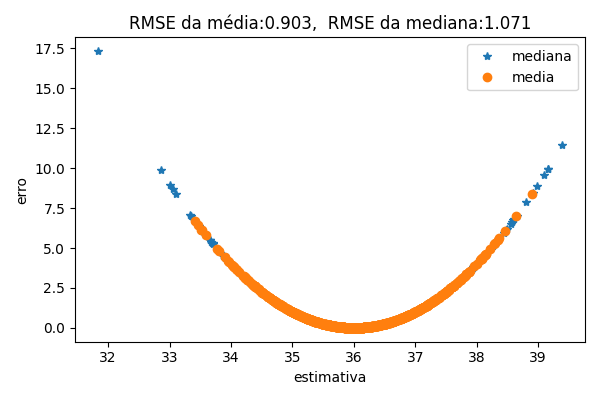

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as st

f, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(sorted(medianas),[x for _,x in sorted(zip(medianas,e2_medianas))],linestyle='',marker='*',label='mediana')
ax1.plot(sorted(medias),[x for _,x in sorted(zip(medias,e2_medias))],linestyle='',marker='o',label='media')

ax1.set_xlabel('estimativa')
ax1.set_ylabel('erro')
ax1.set_title('RMSE da média:'+str(np.round(rmse_media,3))+',  RMSE da mediana:'+str(np.round(rmse_mediana,3)))
#ax1.set_title('Covariância:'+str(np.round(cov,3))+',  Corr.Pearson:'+str(np.round(per,3))+',  Corr.Spearman:'+str(np.round(spe,3)))

ax1.legend()
f.tight_layout()
display(f)

In [22]:
#Faça uma nova simulação para verificar qual estimador, se a variância ou a variância com um grau de liberdade a mais, é a melhor para estimar o desvio padrão 
#da distribuição de idade caso esperemos amostras de apenas 20 exemplares

#dicas: -copie o exercício feito na aula teórica
#       -atente para o valor de sigma da distribuição que quer estimar e do tamanho das amostras
#       -atente para a convergência da simulação


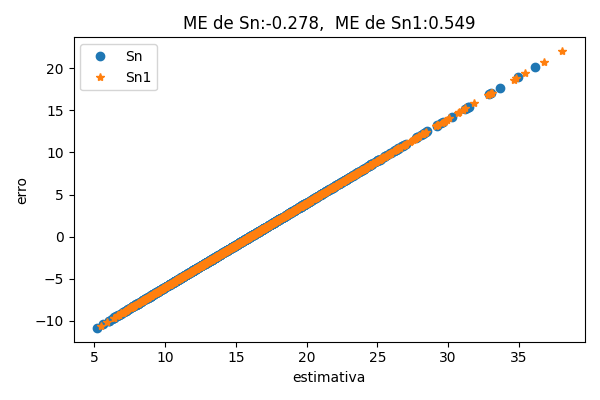

In [23]:
#Plote a lista de erros com o erro médio no título do gráfico
import matplotlib.pyplot as plt
import scipy.stats as st

f, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(sorted(Sns),[x for _,x in sorted(zip(Sns,e_Sn))],linestyle='',marker='o',label='Sn')
ax1.plot(sorted(Sn1s),[x for _,x in sorted(zip(Sn1s,e_Sn1))],linestyle='',marker='*',label='Sn1')

ax1.set_xlabel('estimativa')
ax1.set_ylabel('erro')
ax1.set_title('ME de Sn:'+str(np.round(me_Sn,3))+',  ME de Sn1:'+str(np.round(me_Sn1,3)))

ax1.legend()
f.tight_layout()
display(f)